In [1]:
%pwd

'C:\\Users\\Matthew Stinson'

In [5]:
import pandas as pd
import numpy as np
import os

#print(len(os.listdir("C:\\Users\\Matthew Stinson\\Documents\\GitHub\\final-project\\Macrophage Motility\\Macrophage Motility\\Calculated Values\\Raw Data")))

os.chdir("C:\\Users\\Matthew Stinson\\Documents\\GitHub\\final-project\\Macrophage Motility\\Macrophage Motility\\Calculated Values\\Raw Data")
pd.set_option("display.max_rows", None, "display.max_columns", None)
i = 0
for root,dirs,files in os.walk("C:\\Users\\Matthew Stinson\\Documents\\GitHub\\final-project\\Macrophage Motility\\Macrophage Motility\\Calculated Values\\Raw Data"):
    for name in files:
        if name.endswith(".csv"):
            i += 1
            col_list=["TRACK_ID", "FRAME", "POSITION_X", "POSITION_Y"]
            f=pd.read_csv(name, usecols=col_list)
            f=f[["TRACK_ID", "FRAME", "POSITION_X", "POSITION_Y"]]
            chemotaxis_file = open('chemotaxis_data%s_%s.txt' % (i,f.index[-1]), 'w')
            chemotaxis_file.write(str(f))
            chemotaxis_file.close()
            
        
        
        
#data = pd.read_csv("Calculated Values")
#data.head()

#removes empty columns from data file and creates pandas file

In [49]:
import pandas as pd
import numpy as np
import os

directory = os.path.join("C:\\", "Calculated Values\\Raw Data")
directory1 = os.listdir(directory)
print(directory1)
for files in os.walk(directory):
    print(files)
    for file in files:
        print(file)
        if file.endswith(".csv"):
            f=pd.print_csv(file)
            print(f)
        

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Calculated Values\\Raw Data'

V(microns/hour)F10L0     14.113846
V(microns/hour)F10L5     19.526582
V(microns/hour)F10L10    27.869822
V(microns/hour)F10L30    33.886957
dtype: float64
V(microns/hour)L10F0     22.572581
V(microns/hour)L10F5     25.133793
V(microns/hour)L10F10    27.463866
V(microns/hour)L10F30    27.379487
dtype: float64


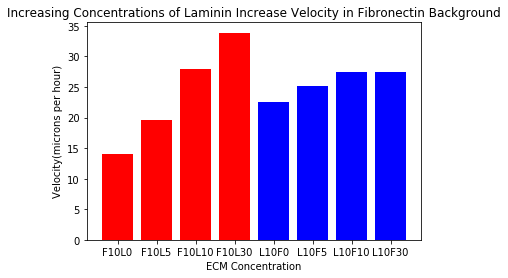

PersistenceF10L0     0.297877
PersistenceF10L5     0.339873
PersistenceF10L10    0.220402
PersistenceF10L30    0.186600
dtype: float64
PersistenceL10F0     0.210952
PersistenceL10F5     0.219517
PersistenceL10F10    0.198866
PersistenceL10F30    0.206137
dtype: float64


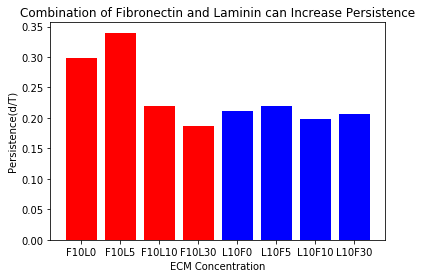

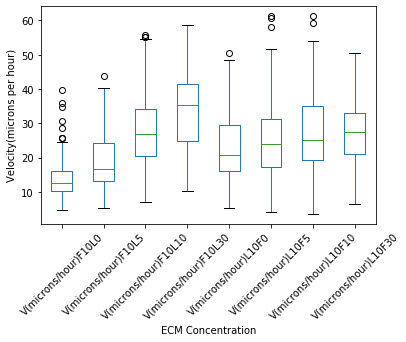

In [144]:
data.columns=['F10L0 Cell', 'V(microns/min)F10L0', 'V(microns/hour)F10L0', 'PersistenceF10L0', 
              'F10L5 Cell', 'V(microns/min)F10L5', 'V(microns/hour)F10L5', 'PersistenceF10L5',
              'F10L10 Cell', 'V(microns/min)F10L10', 'V(microns/hour)F10L10', 'PersistenceF10L10',
              'F10L30 Cell', 'V(microns/min)F10L30', 'V(microns/hour)F10L30', 'PersistenceF10L30',
              'L10F0 Cell', 'V(microns/min)L10F0', 'V(microns/hour)L10F0', 'PersistenceL10F0',
              'L10F5 Cell', 'V(microns/min)L10F5', 'V(microns/hour)L10F5', 'PersistenceL10F5',
              'L10F10 Cell', 'V(microns/min)L10F10', 'V(microns/hour)L10F10', 'PersistenceL10F10',
              'L10F30 Cell', 'V(microns/min)L10F30', 'V(microns/hour)L10F30', 'PersistenceL10F30']

#renames columns to be more relevent

import matplotlib.pyplot as plt

assert type(data[['V(microns/min)F10L0']]) != str

F10V = data[['V(microns/hour)F10L0', 'V(microns/hour)F10L5', 'V(microns/hour)F10L10','V(microns/hour)F10L30']]
F10Vmean = F10V.mean(axis=0)
LabelF10V = ('F10L0','F10L5','F10L10','F10L30')

#establishes mean of the velocity data for all of the Fibronectin constants. LabelF10V will be the X axis in plots

L10V=data[['V(microns/hour)L10F0','V(microns/hour)L10F5','V(microns/hour)L10F10', 'V(microns/hour)L10F30']]
L10Vmean=L10V.mean(axis=0)
LabelL10V = ('L10F0','L10F5','L10F10','L10F30')

#repeats for Laminin constant data

print(F10Vmean)
print(L10Vmean)

#displays the means of all of the velocity data

assert type(L10Vmean) != str

plt.bar(LabelF10V,F10Vmean, color='red')
plt.bar(LabelL10V,L10Vmean, color='blue')
plt.title('Increasing Concentrations of Laminin Increase Velocity in Fibronectin Background')
plt.xlabel('ECM Concentration')
plt.ylabel('Velocity(microns per hour)')
plt.show()

#creates a bar graph with two distinct colors, one for Fibronectin constants, the other for laminin constants

F10P = data[['PersistenceF10L0', 'PersistenceF10L5', 'PersistenceF10L10','PersistenceF10L30']]
F10Pmean = F10P.mean(axis=0)
LabelF10P = ('F10L0','F10L5','F10L10','F10L30')

#here, I can keep the same labels from the velocities. However, the values are now persistence averages 
#of Fibronectin constants

L10P=data[['PersistenceL10F0','PersistenceL10F5','PersistenceL10F10','PersistenceL10F30']]
L10Pmean=L10P.mean(axis=0)
LabelL10P = ('L10F0','L10F5','L10F10','L10F30')

#repeated persistence averages for laminin constants

print(F10Pmean)
print(L10Pmean)

#display the means for the persistence measurements

plt.bar(LabelF10P,F10Pmean, color='red')
plt.bar(LabelL10P,L10Pmean, color='blue')
plt.title('Combination of Fibronectin and Laminin can Increase Persistence')
plt.xlabel('ECM Concentration')
plt.ylabel('Persistence(d/T)')
plt.show()

#creates a bar graph for persistence, much like the bar graph for velocity

FN10VvsL10Vboxplot = data.boxplot(column=['V(microns/hour)F10L0','V(microns/hour)F10L5','V(microns/hour)F10L10',
                                          'V(microns/hour)F10L30', 'V(microns/hour)L10F0', 'V(microns/hour)L10F5',
                                          'V(microns/hour)L10F10','V(microns/hour)L10F30'],grid=False, rot=45)
plt.xlabel('ECM Concentration')
plt.ylabel('Velocity(microns per hour)')
plt.show()

#this way, I can visually see all of the data and compare the experiments. I can also see the varience in the data 
#based on the quartiles and outliers